# IOM Reports Exploration
> Exploratory data analysis of `evaluations.json`

In [ ]:
#| echo: false
import pandas as pd
from fastcore.all import *
from pathlib import Path
import re

import matplotlib.pyplot as plt
import seaborn as sns


## 1. Introduction

This exploratory analysis examines the metadata from IOM's evaluation repository as a preliminary step before mapping reports to strategic frameworks like the Strategic Results Framework (SRF) and Global Compact for Migration (GCM).

This EDA (Exploratory Data Analysis) helps us understand the structure, coverage, and characteristics of available evaluation reports before using the `iomeval` package to create evidence maps that tag reports against framework components. These maps will serve as knowledge management tools, making it easier to identify relevant sources, spot coverage gaps, and determine where synthesis reports would be valuable.

The repository includes various document types, from full evaluation reports to management responses and annexes.

## 2. Repository Overview 

### 2.1 Document Types

In [ ]:
#| echo: false
rep_types = [d['subtype'] for o in data for d in o['docs']]
pd.Series(rep_types).value_counts()

Evaluation report                    745
Evaluation brief                     284
Annexes                              198
Management response                  160
Special related reports/documents     60
Evaluation summary                    49
External evaluation report             2
nan                                    1
Internal evaluation report             1
Name: count, dtype: int64

### 2.2 Evaluation Levels

Distribution (%) of evaluations by organizational scope (project, country, regional, thematic, strategic).

In [ ]:
#| echo: false
pd.Series([o['meta']['Level of Evaluation'] for o in data]).value_counts(normalize=True).mul(100).round(1)

Decentralized    85.7
Centralized      11.6
Other             2.7
Name: proportion, dtype: float64

### 2.3 Evaluation Scope

In [ ]:
#| echo: false
evl_scope = L([o['meta']['Type of Evaluation Scope'].split(',') for o in data if not pd.isna(o['meta']['Type of Evaluation Scope'])]).concat().map(str.strip)
pd.Series(evl_scope).value_counts()

Programme/Project    664
Thematic              57
Strategy              30
Synthesis             12
Policy                10
Name: count, dtype: int64

## 3. Temporal Trends

### 3.1 Publication Timeline

The repository contains evaluations spanning from 1985 to 2025, with notable variation in publication volume over time.

In [ ]:
#| echo: false
year_cnts = pd.Series(rep_years).value_counts()

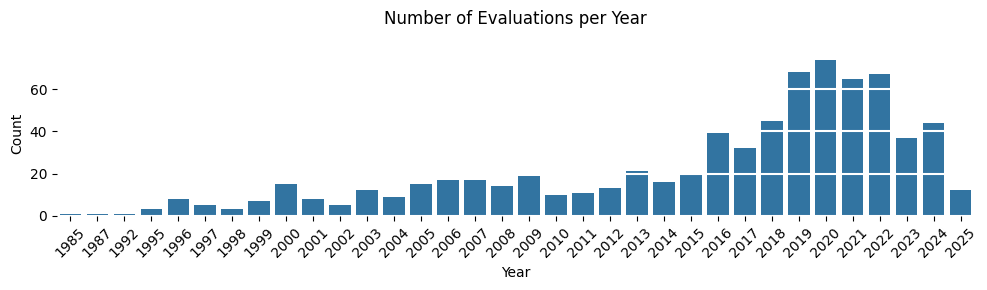

In [ ]:
#| echo: false
year_cnts = pd.Series(rep_years).value_counts()

plt.figure(figsize=(10, 3))
sns.barplot(x=year_cnts.index, y=year_cnts.values)
plt.grid(axis='y', color='white', lw=1.5)
plt.box(False)
plt.title('Number of Evaluations per Year', pad=20)
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

## 4. Thematic Analysis

Evaluations span 20+ migration themes, with Transition Recovery and Migration and Development being the most frequently assessed areas.

### 4.1 Primary Migration Themes

In [ ]:
#| echo: false
sanitize = lambda s: re.sub(r'\([^)]*\)', lambda m: m.group().lower(), s)
split_themes = lambda s: re.split(r', (?=[A-Z])', s)

themes_flat = L([split_themes(sanitize(o)) for o in themes if not pd.isna(o)]).concat()
df_themes = pd.DataFrame([o.split(' - ', 1) for o in themes_flat], columns=['theme', 'subtheme'])
df_themes['subtheme'] = df_themes['subtheme'].str.strip().str.capitalize().fillna('No subtheme')

theme_counts = df_themes.groupby('theme').size().sort_values(ascending=False)
subtheme_counts = df_themes.groupby(['theme', 'subtheme']).size().reset_index(name='cnt')

subtheme_counts_per_theme = subtheme_counts[subtheme_counts['subtheme'] != 'No subtheme'].groupby('theme').size()
themes_with_multiple_subs = subtheme_counts_per_theme[subtheme_counts_per_theme > 1].index

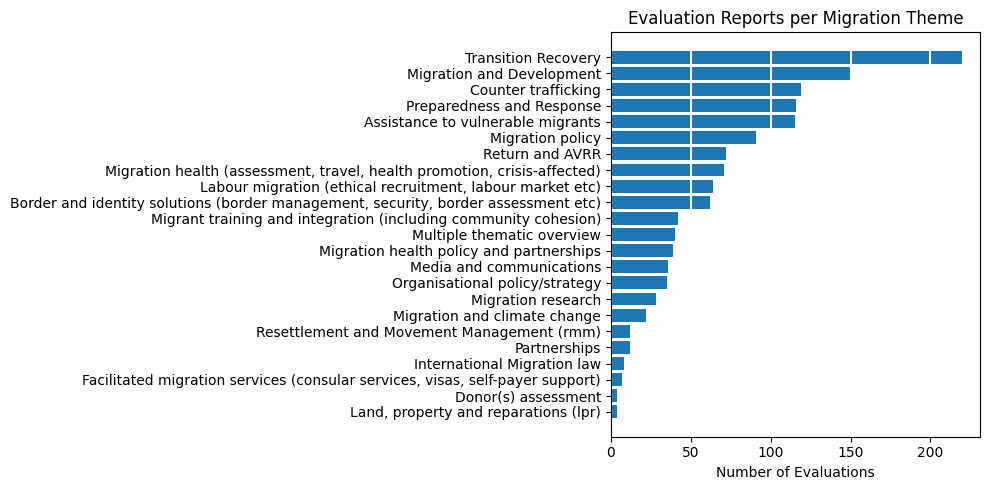

In [ ]:
#| echo: false
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(theme_counts.index, theme_counts.values)
ax.invert_yaxis()
ax.set_xlabel('Number of Evaluations')
ax.set_title('Evaluation Reports per Migration Theme')
plt.tight_layout()
plt.grid(axis='x', color='white', lw=1.5)
plt.show()

### 4.2 Subtheme breakdowns

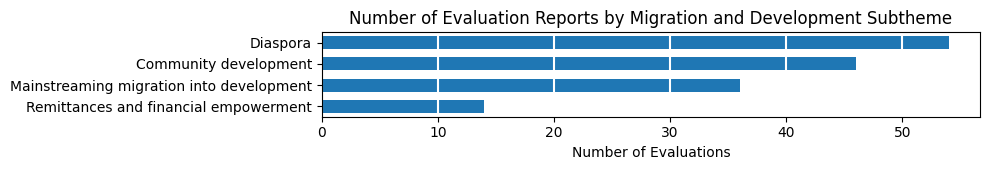

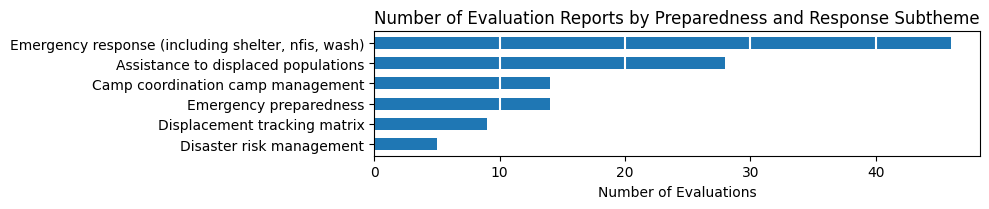

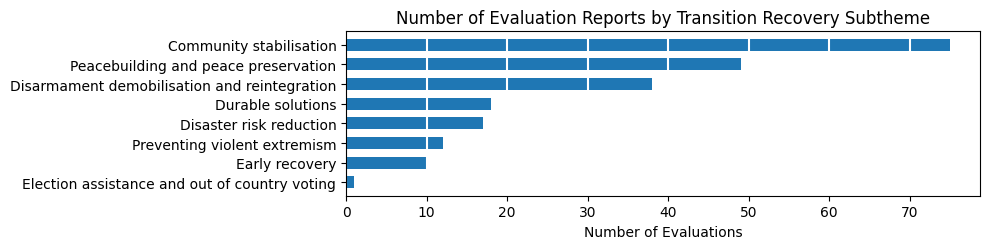

In [ ]:
#| echo: false
for theme in themes_with_multiple_subs:
    df_theme = subtheme_counts[subtheme_counts['theme'] == theme].sort_values('cnt', ascending=False)
    fig_height = len(df_theme) * 0.2 + 1
    fig, ax = plt.subplots(figsize=(10, fig_height))
    ax.barh(df_theme['subtheme'], df_theme['cnt'], height=0.6)
    ax.invert_yaxis()
    ax.set_xlabel('Number of Evaluations')
    ax.set_title(f'Number of Evaluation Reports by {theme} Subtheme')
    plt.tight_layout()
    plt.grid(axis='x', color='white', lw=1.5)
    plt.show()

### 4.3 Cross-Cutting Themes

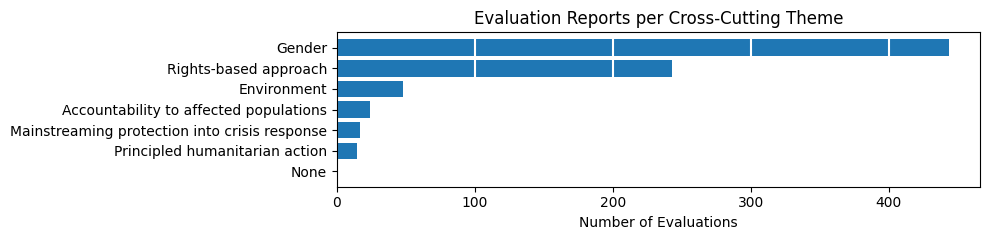

In [ ]:
#| echo: false
cc_themes = L([o['meta']['Relevant Crosscutting Themes'].split(',')  for o in data if pd.notna(o['meta']['Relevant Crosscutting Themes'])]).concat().map(str.strip)

cc_cnts = pd.Series(cc_themes).value_counts()

fig, ax = plt.subplots(figsize=(10, 2.5))
ax.barh(cc_cnts.index, cc_cnts.values)
ax.invert_yaxis()
ax.set_xlabel('Number of Evaluations')
ax.set_title('Evaluation Reports per Cross-Cutting Theme')
plt.tight_layout()
plt.grid(axis='x', color='white', lw=1.5)
plt.show()

## 5. Geographic Coverage

### 5.1 Country Coverage

Evaluations cover 150+ countries, with Colombia, Ethiopia, and multi-country ('Worldwide') studies being most common.

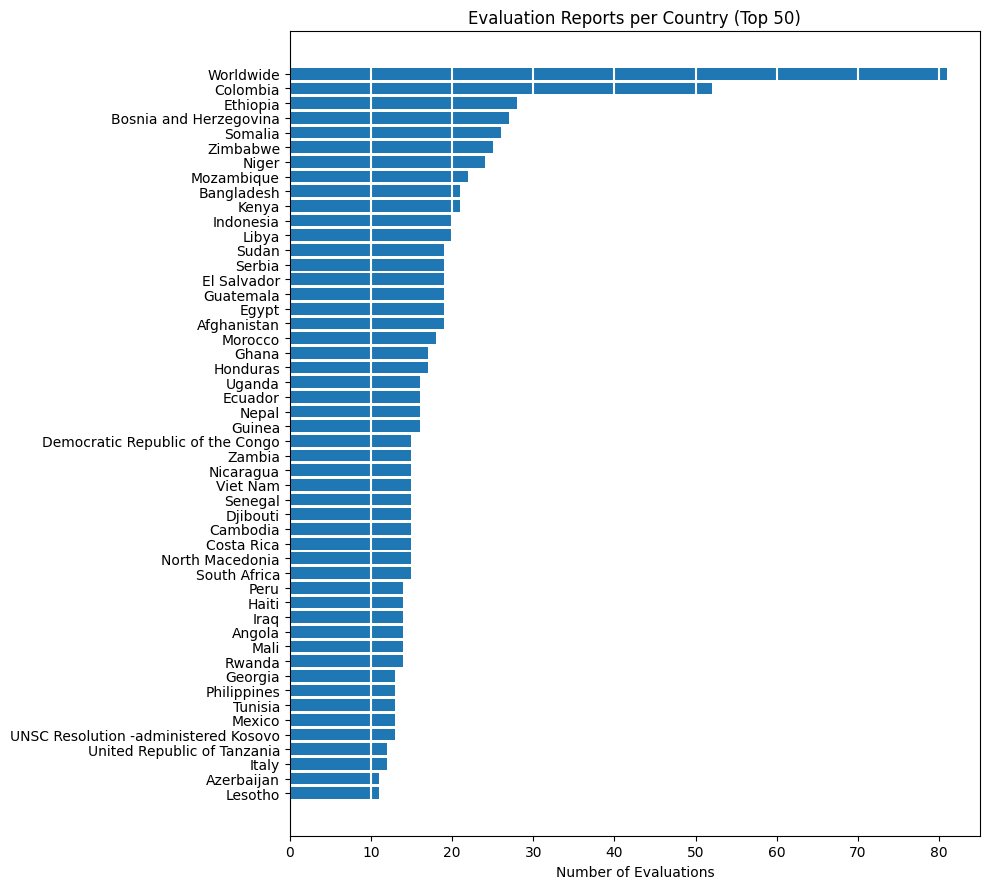

In [ ]:
#| echo: false
cntry = L([o['meta']['Countries Covered'] for o in data]).concat()

cntry_cnts = pd.Series(cntry).value_counts()[:50]

fig, ax = plt.subplots(figsize=(10, 9))
ax.barh(cntry_cnts.index, cntry_cnts.values)
ax.invert_yaxis()
ax.set_xlabel('Number of Evaluations')
ax.set_title('Evaluation Reports per Country (Top 50)')
plt.tight_layout()
plt.grid(axis='x', color='white', lw=1.5)
plt.show()